In [ ]:
import pandas as pd
import numpy as np
Data = pd.read_csv('ChurnData.csv')
print('Shape before deleting duplicate values:', Data.shape)

# Removing duplicate rows if any
Data=Data.drop_duplicates()
print('Shape After deleting duplicate values:', Data.shape)

Data.head(10)

Shape before deleting duplicate values: (150000, 8)
Shape After deleting duplicate values: (147498, 8)


,Churn,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio
0,1,0.766127,45,6,2,9120,2,0.852982
1,0,0.957151,40,0,1,4600,2,0.121876
2,0,0.658180,38,0,0,5042,2,0.085113
3,0,0.233810,30,0,0,5300,2,0.036050
4,0,0.907239,49,1,0,6357,2,0.024926
5,0,0.213179,74,1,1,5500,2,0.375607
6,0,0.305682,57,3,0,6357,2,0.274502
7,0,0.754464,39,0,0,5500,2,0.209940
8,0,0.116951,27,0,0,6357,2,0.274502
9,0,0.189169,57,4,2,6357,2,0.606291


In [ ]:
Data.info()
Data.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147498 entries, 0 to 149998
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Churn               147498 non-null  int64  
 1   utilization         147498 non-null  float64
 2   Age                 147498 non-null  int64  
 3   Num_loans           147498 non-null  int64  
 4   Num_dependents      147498 non-null  int64  
 5   MonthlyIncome       147498 non-null  int64  
 6   Num_Savings_Acccts  147498 non-null  int64  
 7   DebtRatio           147498 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 10.1 MB


Churn                      2
utilization           122596
Age                       85
Num_loans                 15
Num_dependents            11
MonthlyIncome          13417
Num_Savings_Acccts         9
DebtRatio             103729
dtype: int64

In [ ]:
Data.describe()

,Churn,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio
count,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000
mean,0.067194,0.301473,52.300085,1.026963,0.749508,7687.834466,5.258315,0.301310
std,0.250359,0.330363,14.710888,1.108859,1.111023,3539.105870,2.167324,0.200009
min,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.031072,41.000000,0.000000,0.000000,5700.000000,3.000000,0.178393
50%,0.000000,0.154835,52.000000,1.000000,0.000000,6357.000000,5.000000,0.274502
75%,0.000000,0.500162,63.000000,2.000000,1.000000,9166.000000,7.000000,0.386703
max,1.000000,1.000000,109.000000,14.000000,10.000000,25000.000000,9.000000,1.050000


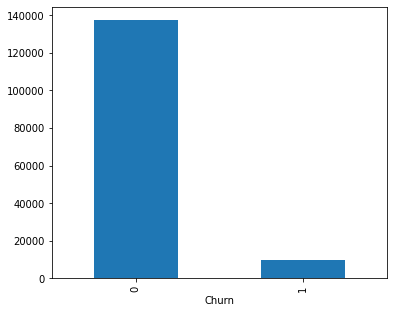

In [ ]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=Data.groupby('Churn').size()
GroupedData.plot(kind='bar', figsize=(6,5))

In [ ]:
Data.columns

Index(['Churn', 'utilization', 'Age', 'Num_loans', 'Num_dependents',
       'MonthlyIncome', 'Num_Savings_Acccts', 'DebtRatio'],
      dtype='object')

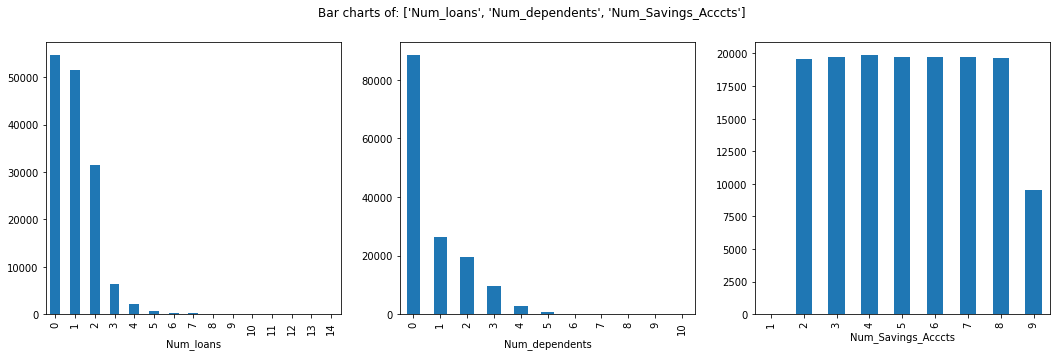

In [ ]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=Data, colsToPlot=['Num_loans', 'Num_dependents','Num_Savings_Acccts'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc33ed625c0>,
      dtype=object)

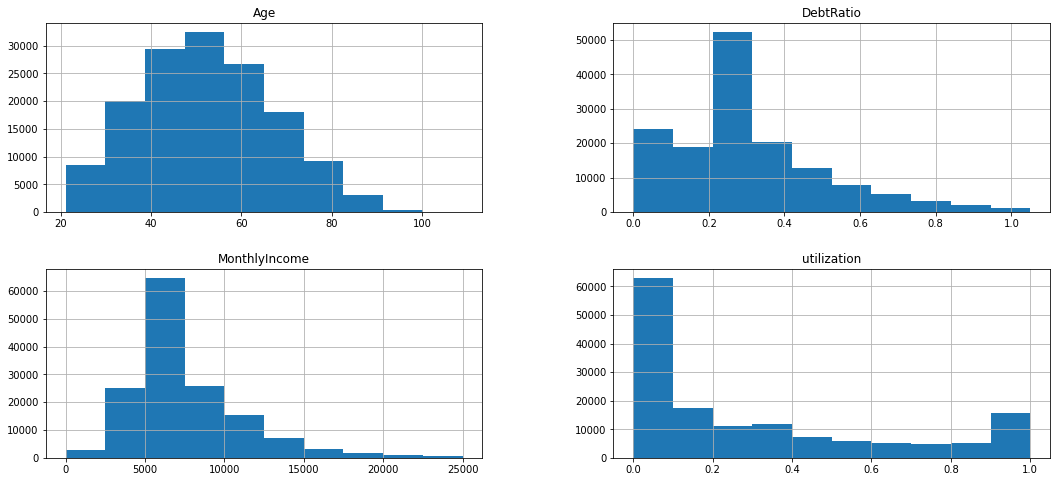

In [ ]:
Data.hist(['utilization','Age','MonthlyIncome','DebtRatio'], figsize=(18,8))

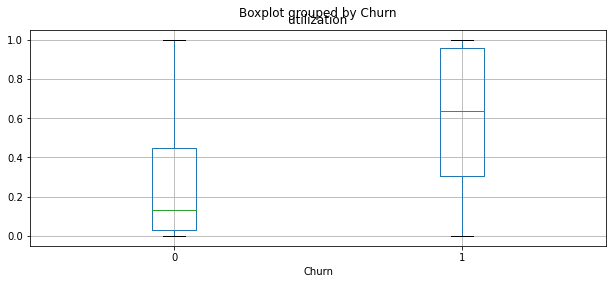

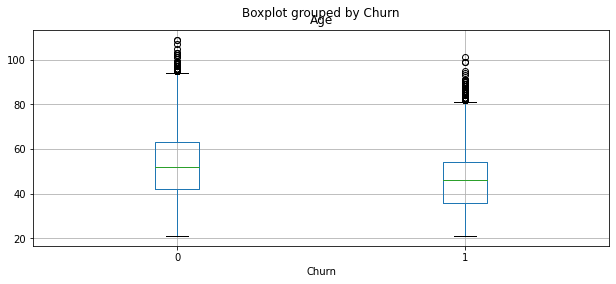

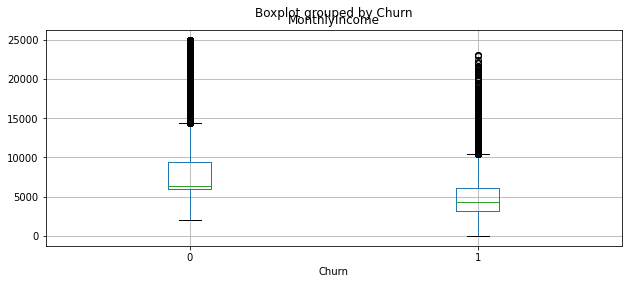

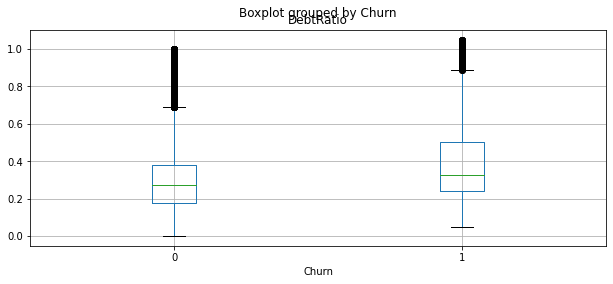

In [ ]:
Data.boxplot(column='utilization', by='Churn', figsize=(10,4), vert=True)
Data.boxplot(column='Age', by='Churn', figsize=(10,4), vert=True)
Data.boxplot(column='MonthlyIncome', by='Churn', figsize=(10,4), vert=True)
Data.boxplot(column='DebtRatio', by='Churn', figsize=(10,4), vert=True)

In [ ]:
GroupedData=Data.groupby('Churn')
GroupedData.mean()

,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio
Churn,,,,,,,
0,0.280449,52.751408,1.029356,0.735644,7871.199176,5.256630,0.295495
1,0.593334,46.034709,0.993744,0.941984,5142.319342,5.281707,0.382030


In [ ]:
def AutoAnova(InpData, targetCol, InputCol):
  from scipy.stats import f_oneway

  for col in InputCol:
    groupeddata = InpData.groupby(targetCol)[col].apply(list)
    aov = f_oneway(*groupeddata)
    if aov[1]<=0.05:
      print("One-way ANOVA P-Value for",col,"=",aov[1])

#ANOVA test to understant the dependency of price over each independent variable 
AutoAnova(Data,'Churn',['utilization','Age','MonthlyIncome','DebtRatio'])

One-way ANOVA P-Value for utilization = 0.0
One-way ANOVA P-Value for Age = 0.0
One-way ANOVA P-Value for MonthlyIncome = 0.0
One-way ANOVA P-Value for DebtRatio = 0.0


In [ ]:
def AutoChi(InpData, targetCol, InputCol):
  from scipy.stats import chi2_contingency as ch

  for col in InputCol:
    CrossTab = pd.crosstab(index = InpData[col], columns=InpData[targetCol])
    ChSq = ch(CrossTab)
    if ChSq[1]<=0.05:
      print('Chi-Square test P-Value for',col,'=',ChSq[1])

AutoChi(InpData=Data, targetCol='Churn',InputCol=['Num_loans', 'Num_dependents','Num_Savings_Acccts'])

Chi-Square test P-Value for Num_loans = 1.7330151724541351e-140
Chi-Square test P-Value for Num_dependents = 2.1319002699114503e-67


In [ ]:
Data.isnull().sum()

Churn                 0
utilization           0
Age                   0
Num_loans             0
Num_dependents        0
MonthlyIncome         0
Num_Savings_Acccts    0
DebtRatio             0
dtype: int64

In [ ]:
# Saving the processed data as a pickle file
Data.to_pickle('ChurnData.pkl')

Imbalance Treatment

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=24, ratio=1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Separate Target Variable and Predictor Variables
Target='Churn'
Predictors=['utilization', 'Age', 'Num_loans', 'Num_dependents','MonthlyIncome', 'Num_Savings_Acccts', 'DebtRatio']


X=Data[Predictors].values
y=Data[Target].values

# Treating Imbalance
X,y = ros.fit_resample(X,y)

### Sandardization of data ###
### We does not standardize the Target variable for classification
#from sklearn.preprocessing import StandardScaler
#PredictorScaler=StandardScaler()

# Storing the fit object for later reference
#PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
#X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=24)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(165104, 7)
(165104,)
(110070, 7)
(110070,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression
#Choose model parameters
model = LogisticRegression(C=2,penalty='l2',solver='newton-cg')  #class_weight='balanced',

#Building model on training data
LOG = model.fit(X_train,y_train)
pred_prob = LOG.predict_proba(X_test)
pred = []
for k in pred_prob:
  Probability = k[1]
  if k[1]>=0.5:
    pred.append(1)
  elif k[1]<0.5:
    pred.append(0)

#Measuring accuracy on training data
print(LOG.score(X_train,y_train))

#Measuring accuracy on testing data
print(LOG.score(X_test,y_test))

from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Scaling the test data back to original scale
#Test_Data=PredictorScalerFit.inverse_transform(X_test)
Test_Data = X_test
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Probability']=Probability
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()

0.7586248667506541
0.7596529481239211
              precision    recall  f1-score   support

           0       0.76      0.75      0.76     55005
           1       0.76      0.77      0.76     55065

    accuracy                           0.76    110070
   macro avg       0.76      0.76      0.76    110070
weighted avg       0.76      0.76      0.76    110070

[[41400 13605]
 [12850 42215]]
Accuracy of the model: 0.76


,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio,Churn,Probability,PredictedChurn
0,0.016310,55.0,2.0,0.0,6357.0,2.0,0.274502,0,0.516754,0
1,1.000000,41.0,0.0,2.0,3682.0,3.0,0.366318,1,0.516754,1
2,1.000000,42.0,0.0,2.0,8448.0,2.0,0.182915,1,0.516754,1
3,0.339612,65.0,1.0,0.0,2996.0,8.0,0.640257,1,0.516754,1
4,0.267830,51.0,2.0,0.0,5800.0,2.0,0.536964,0,0.516754,1


In [ ]:
pred_prob = LOG.predict_proba(X_test)
pred = []
for k in pred_prob:
  if k[0]>=0.7:
    prob = k
    pred.append(1)
  else:
    pred.append(0)  
pred

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     55005
           1       0.76      0.77      0.76     55065

    accuracy                           0.76    110070
   macro avg       0.76      0.76      0.76    110070
weighted avg       0.76      0.76      0.76    110070

[[41400 13605]
 [12850 42215]]
Accuracy of the model: 0.76


,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio,Churn,PredictedChurn
0,0.016310,55.0,2.0,0.0,6357.0,2.0,0.274502,0,0
1,1.000000,41.0,0.0,2.0,3682.0,3.0,0.366318,1,1
2,1.000000,42.0,0.0,2.0,8448.0,2.0,0.182915,1,1
3,0.339612,65.0,1.0,0.0,2996.0,8.0,0.640257,1,1
4,0.267830,51.0,2.0,0.0,5800.0,2.0,0.536964,0,1


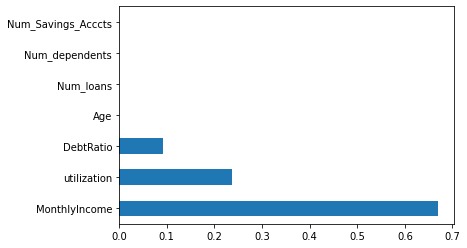

In [ ]:
from sklearn import tree
#Choose model parameters
model = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')

#Building model on training data
dtree = model.fit(X_train,y_train)
pred = dtree.predict_proba(X_test)
pred = []
for k in pred_prob:
  Probability = k[1]
  if k[1]>=0.5:
    pred.append(1)
  elif k[1]<0.5:
    pred.append(0)


from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(dtree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Scaling the test data back to original scale
#Test_Data=PredictorScalerFit.inverse_transform(X_test)
Test_Data=X_test

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()


In [ ]:
!apt-get install dtreeplt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package dtreeplt


In [ ]:
!pip install dtreeplt

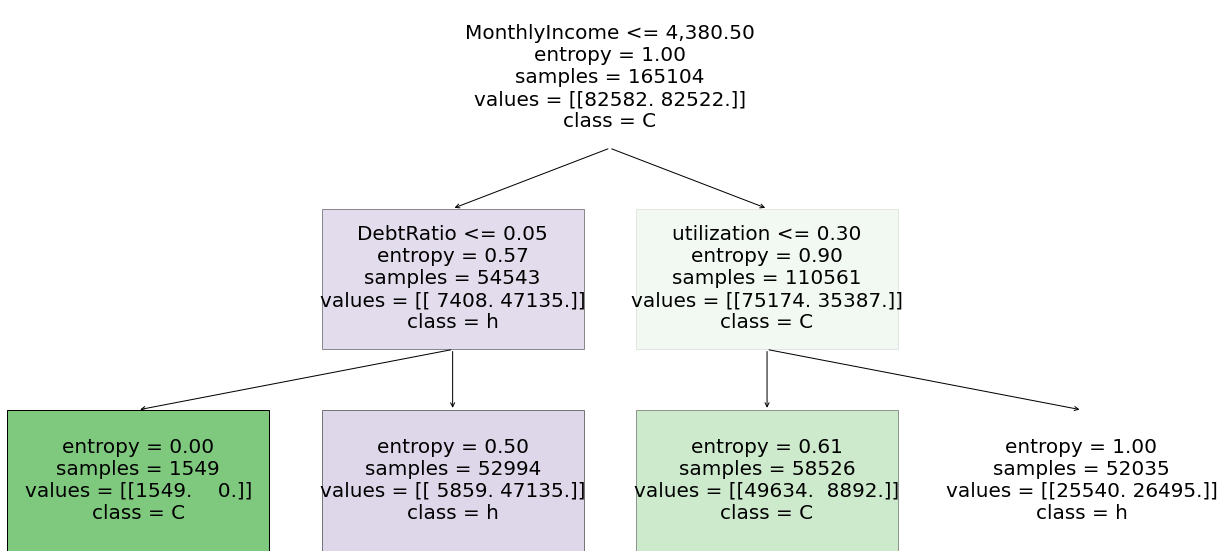

In [ ]:
#Plotting Decision tree
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt

# Plotting the decision tree
Dtree = dtreeplt(model=dtree, feature_names=Predictors, target_names=Target)
fig = Dtree.view()

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     55005
           1       0.80      0.78      0.79     55065

    accuracy                           0.79    110070
   macro avg       0.80      0.79      0.79    110070
weighted avg       0.80      0.79      0.79    110070

[[44497 10508]
 [12058 43007]]
Accuracy of the model: 0.79


,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio,Churn,PredictedChurn
0,0.016310,55.0,2.0,0.0,6357.0,2.0,0.274502,0,0
1,1.000000,41.0,0.0,2.0,3682.0,3.0,0.366318,1,1
2,1.000000,42.0,0.0,2.0,8448.0,2.0,0.182915,1,0
3,0.339612,65.0,1.0,0.0,2996.0,8.0,0.640257,1,1
4,0.267830,51.0,2.0,0.0,5800.0,2.0,0.536964,0,0


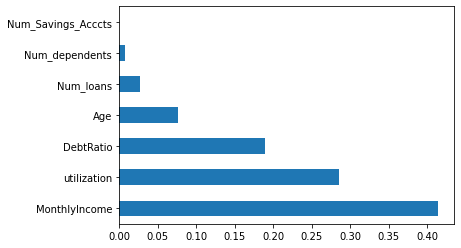

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Choose model parameters
model = RandomForestClassifier(max_depth=2, n_estimators=1000, criterion='entropy')

#Building model on training data
RF = model.fit(X_train,y_train)
pred = RF.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()


              precision    recall  f1-score   support

           0       0.85      0.86      0.85     55005
           1       0.86      0.85      0.85     55065

    accuracy                           0.85    110070
   macro avg       0.85      0.85      0.85    110070
weighted avg       0.85      0.85      0.85    110070

[[47240  7765]
 [ 8412 46653]]
Accuracy of the model: 0.85


,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio,Churn,PredictedChurn
0,0.016310,55.0,2.0,0.0,6357.0,2.0,0.274502,0,0
1,1.000000,41.0,0.0,2.0,3682.0,3.0,0.366318,1,1
2,1.000000,42.0,0.0,2.0,8448.0,2.0,0.182915,1,1
3,0.339612,65.0,1.0,0.0,2996.0,8.0,0.640257,1,1
4,0.267830,51.0,2.0,0.0,5800.0,2.0,0.536964,0,1


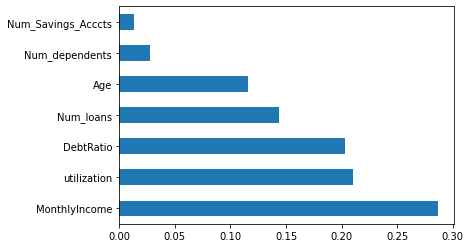

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model = AdaBoostClassifier(n_estimators=500, base_estimator=DTC, learning_rate=0.1)

#Building model on training data
AB = model.fit(X_train,y_train)
pred = AB.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()


              precision    recall  f1-score   support

           0       0.84      0.86      0.85     55005
           1       0.85      0.84      0.85     55065

    accuracy                           0.85    110070
   macro avg       0.85      0.85      0.85    110070
weighted avg       0.85      0.85      0.85    110070

[[47049  7956]
 [ 8670 46395]]
Accuracy of the model: 0.85


,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio,Churn,PredictedChurn
0,0.016310,55.0,2.0,0.0,6357.0,2.0,0.274502,0,0
1,1.000000,41.0,0.0,2.0,3682.0,3.0,0.366318,1,1
2,1.000000,42.0,0.0,2.0,8448.0,2.0,0.182915,1,1
3,0.339612,65.0,1.0,0.0,2996.0,8.0,0.640257,1,1
4,0.267830,51.0,2.0,0.0,5800.0,2.0,0.536964,0,0


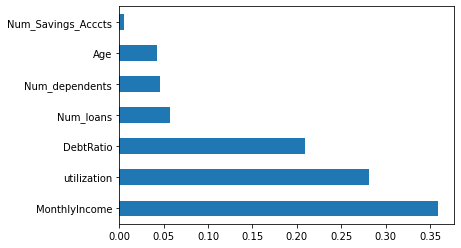

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=2, learning_rate=0.1,n_estimators=500, objective='binary:logistic', booster='gbtree')

#Building model on training data
XGB = model.fit(X_train,y_train)
pred = XGB.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=24, ratio=1)

In [ ]:
# Separate Target Variable and Predictor Variables
Target='Churn'
Predictors=['utilization', 'Age', 'Num_loans', 'Num_dependents','MonthlyIncome', 'Num_Savings_Acccts', 'DebtRatio']


X=Data[Predictors].values
y=Data[Target].values

# Treating Imbalance
X,y = ros.fit_resample(X,y)

### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=24)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(165104, 7)
(165104,)
(110070, 7)
(110070,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)


#Building model on training data
KNN = model.fit(X_train,y_train)
pred = KNN.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     55005
           1       0.89      1.00      0.94     55065

    accuracy                           0.94    110070
   macro avg       0.95      0.94      0.94    110070
weighted avg       0.95      0.94      0.94    110070

[[48495  6510]
 [   32 55033]]
Accuracy of the model: 0.94


,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio,Churn,PredictedChurn
0,0.016310,55.0,2.0,0.0,6357.0,2.0,0.274502,0,0
1,1.000000,41.0,0.0,2.0,3682.0,3.0,0.366318,1,1
2,1.000000,42.0,0.0,2.0,8448.0,2.0,0.182915,1,1
3,0.339612,65.0,1.0,0.0,2996.0,8.0,0.640257,1,1
4,0.267830,51.0,2.0,0.0,5800.0,2.0,0.536964,0,1


In [ ]:
from sklearn import svm
model = svm.SVC(C=10, kernel='rbf', gamma=0.01)
#Building model on training data
SVM = model.fit(X_train,y_train)
pred = SVM.predict(X_test)


In [ ]:
from sklearn import svm

model = svm.SVC(C=10, kernel='rbf', gamma=0.01)


#Building model on training data
SVM = model.fit(X_train,y_train)
pred = SVM.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
#Works only for kernel = linear 
#%matplotlib inline
#feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

model = GaussianNB()
#model = MultinomialNB()


#Building model on training data
NB = model.fit(X_train,y_train)
pred = NB.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# not available

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()


              precision    recall  f1-score   support

           0       0.74      0.74      0.74     55005
           1       0.74      0.74      0.74     55065

    accuracy                           0.74    110070
   macro avg       0.74      0.74      0.74    110070
weighted avg       0.74      0.74      0.74    110070

[[40831 14174]
 [14053 41012]]
Accuracy of the model: 0.74


,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio,Churn,PredictedChurn
0,0.016310,55.0,2.0,0.0,6357.0,2.0,0.274502,0,0
1,1.000000,41.0,0.0,2.0,3682.0,3.0,0.366318,1,1
2,1.000000,42.0,0.0,2.0,8448.0,2.0,0.182915,1,1
3,0.339612,65.0,1.0,0.0,2996.0,8.0,0.640257,1,1
4,0.267830,51.0,2.0,0.0,5800.0,2.0,0.536964,0,0


## K-Fold Cross Validation

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

In [ ]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print(Accuracy_Values)
print('Final Average Accuracy of the model:', Accuracy_Values.mean())

[0.9120415  0.94316375 0.94217291 0.91501375 0.91864556 0.94231749
 0.94198714 0.91571616 0.91675508 0.88943949]
Final Average Accuracy of the model: 0.9237252826818336


# Deployment of the Model
In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the rating of restaurent(s)

#### Step 1. Retraining the model using 100% data

In [ ]:
# Training the model on 100% Data available
FinalKNNModel=KNN.fit(X,y)

In [ ]:
# Saving the model as pickle file
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalKNNModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalKNNModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


In [ ]:
# This function will take input one or more rows of restaurent details and output their ratings
# This can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    
    # Loading the Function from pickle file
    with open('FinalKNNModel.pkl', 'rb') as fileReadStream:
        KNN_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
        
    # Genrating Predictions
    Prediction=KNN_model.predict(InputLoanDetails)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [ ]:
#Calling the function for some loan cases from the data
PredictLoanStatus(InputLoanDetails=X[0:5,:])

,Predicted Status
0,1
1,0
2,0
3,0
4,0


In [ ]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_married, inp_education, inp_credit_history):
    SampleInputData=[[inp_married, inp_education , inp_credit_history]]
    
    # Loading the model from pickle file
    with open('FinalAdaboostModel.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
        
    # Returning the predicted loan status
    return('Approval Status: ' + str(AdaBoost_model.predict(SampleInputData)))

# Function call
FunctionLoanPrediction(inp_married=0, inp_education=1, inp_credit_history=1.0)